# Gendered Emotions: Masculine and Feminine Emotional Modes of Writing in Japanese Atomic Bomb Literature

In [18]:
import pandas as pd
import statistics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import numpy as np

### Corpus Description

This corpus contains of 117 fiction pieces taken from *Nihon no genbaku bungaku* (*Japanese Atomic Bomb Literature*), a 15-volume anthology of *genbaku bungaku* (Atomic Bomb Literature). The texts were scanned and OCR-ed with ABBYY FineReader and splitted into the pieces following the anthology's division (chapters of longer novels were put in the corpus as separate pieces). Non-fiction (like essays, correspondence, etc.) were excluded from the analysis.
The corpus contains from works of 42 authors, among which 32 are males and 10 females:
<br>
Male authors:<br>
Abe Kazue<br>
Fujimoto Hitoshi<br>
Fumizawa Ryuichi<br>
Hara Tamiki<br>
Hashioka Takeshi<br>
Hosoda Tamiki<br>
Hotta Yoshie<br>
Iida Momo<br>
Ikuguchi Juro<br>
Inoue Mitsuhara<br>
Ishida Koji<br>
Iwasaki Seiichiro<br>
Kajiyama Tohiyuki<br>
Kamezawa Miyuki<br>
Kanai Toshihiro<br>
Katsura Yoshihisa<br>
Kawakami Sokun<br>
Kokubo Hitoshi<br>
Kurita Tohei<br>
Kyo Kusao<br>
Nakai Masafumi<br>
Nakayama Shiro<br>
Nakazato Kisho<br>
Natsubori Masamoto<br>
Nishihara Kei<br>
Ochi Michio<br>
Oda Katsuzo<br>
Oda Makoto<br>
Oe Kenzaburo<br>
Saiki Hisao<br>
Takeda Taijun<br>
Tsukuda Jitsuo<br>
<br>
Female authors:<br>
<br>
Ariyoshi Sawako<br>
Hayashi Kyoko<br>
Hironaka Toshio<br>
Inada Mihoko<br>
Kora Chihoko<br>
Mikawa Kiyo<br>
Nakamoto Takako<br>
Ota Yoko<br>
Sata Ineko<br>
Takenishi Hiroko<br>
<br>
Among which there are 76 pieces written by males and 41 by females.


### Sentiment Analysis

In [10]:
sentiment_data = pd.read_excel(r"C:\Users\Artem\Documents\my python projects\Masculine and Feminine in Atomic Bomb Literature\data\results.xlsx")
sentiment_data

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,0,有吉 佐和子 - 祈禱,F,30102,0.007671,0.065030,-0.035530,0.100560,Yes
1,1,林 京子 - ギヤマン ビードロ,F,112867,-0.011454,-0.054455,-0.010385,-0.044071,No
2,2,林 京子 - 二人の墓標,F,22251,-0.110104,-0.139089,-0.098741,-0.040348,No
3,3,林 京子 - 同期会,F,16390,0.016105,0.142857,0.017386,0.125471,Yes
4,4,林 京子 - 昭和二十年の夏,F,18826,-0.013255,0.500000,-0.015090,0.515090,Yes
...,...,...,...,...,...,...,...,...,...
112,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.119351,-0.257576,-0.111784,-0.145792,No
113,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.006504,-0.204678,0.023987,-0.228665,No
114,114,斎木寿夫 - 死者は裁かない,M,17833,-0.130481,-0.121918,-0.128818,0.006900,Yes
115,115,武田 泰淳 - 第一のボタン,M,78975,0.004374,0.045368,-0.023118,0.068487,Yes


In [11]:
female_difference = list(sentiment_data["Difference Value"][:41])
male_difference = list(sentiment_data["Difference Value"][41:])
print(f"Women's average sentiment differense: {statistics.mean(female_difference)}")
print(f"Women's median sentiment differense: {statistics.median(female_difference)}\n")
print(f"men's average sentiment differense: {statistics.mean(male_difference)}")
print(f"men's median sentiment differense: {statistics.median(male_difference)}\n")
negative_male = [score for score in male_difference if score <0]
negative_female = [score for score in female_difference if score <0]
print(f"Ratio of negative sentiment cases in women's writings: {len(negative_female)} of {len(female_difference)} or {len(negative_female) / len(female_difference)}")
print(f"Ratio of negative sentiment cases in men's writings: {len(negative_male)} of {len(male_difference)} or {len(negative_male) / len(male_difference)}")


Women's average sentiment differense: 0.014651917183045697
Women's median sentiment differense: 0.04096650192202086

men's average sentiment differense: 0.0633126076839378
men's median sentiment differense: 0.03955918100802006

Ratio of negative sentiment cases in women's writings: 17 of 41 or 0.4146341463414634
Ratio of negative sentiment cases in men's writings: 19 of 76 or 0.25


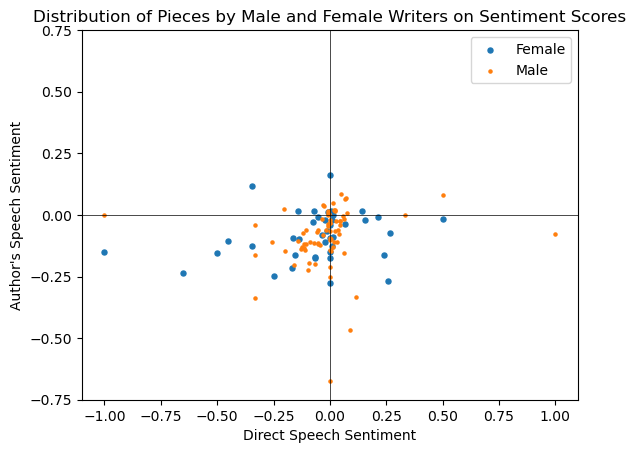

In [12]:
x_female = sentiment_data["Direct Speech Sentiment"][:41]
x_male = sentiment_data["Direct Speech Sentiment"][41:]
y_female = sentiment_data["Author\'s Speech Sentiment"][:41]
y_male = sentiment_data["Author\'s Speech Sentiment"][41:]

plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")

plt.show()

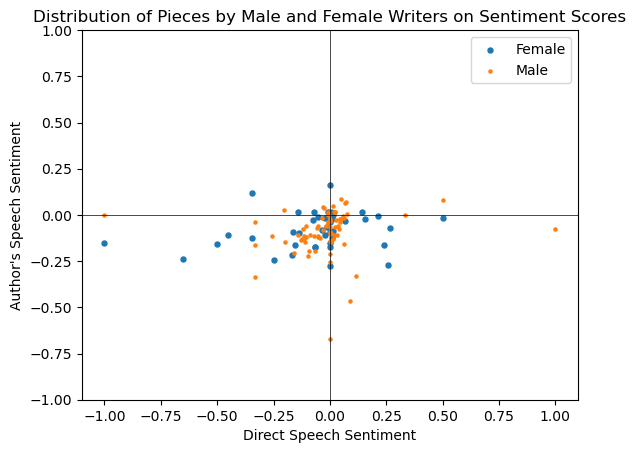

In [13]:
plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")
plt.savefig("sentiment distribution 1.jpeg", dpi=200)

plt.show()

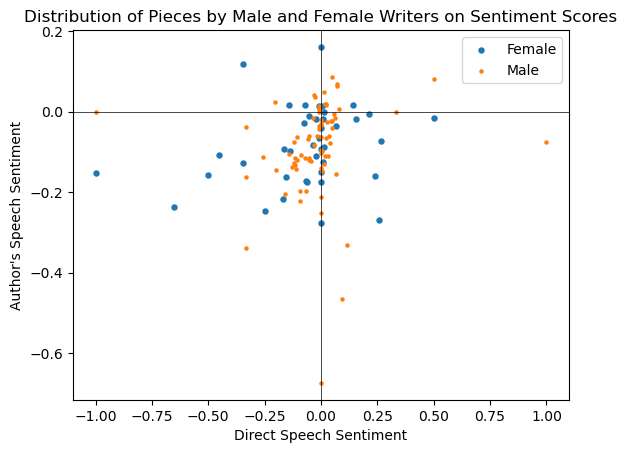

In [14]:
plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")
plt.savefig ("sentiment distribution 2.jpeg",dpi=200)

plt.show()

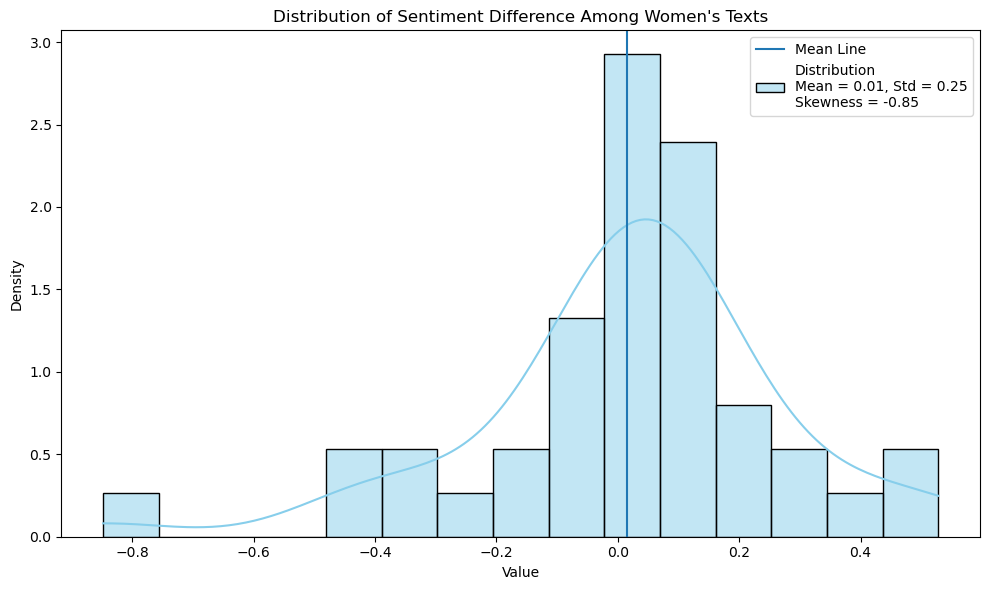

In [27]:
data = female_difference
mu, std = np.mean(data), np.std(data)
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, color='skyblue', stat='density', edgecolor='black', label=f"""Distribution\nMean = {mu:.2f}, Std = {std:.2f}
Skewness = {skew(data):.2f}""")
plt.axvline(x=mu, label = "Mean Line")
plt.title("Distribution of Sentiment Difference Among Women's Texts")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("distribution women.jpeg", dpi=200)
plt.show()




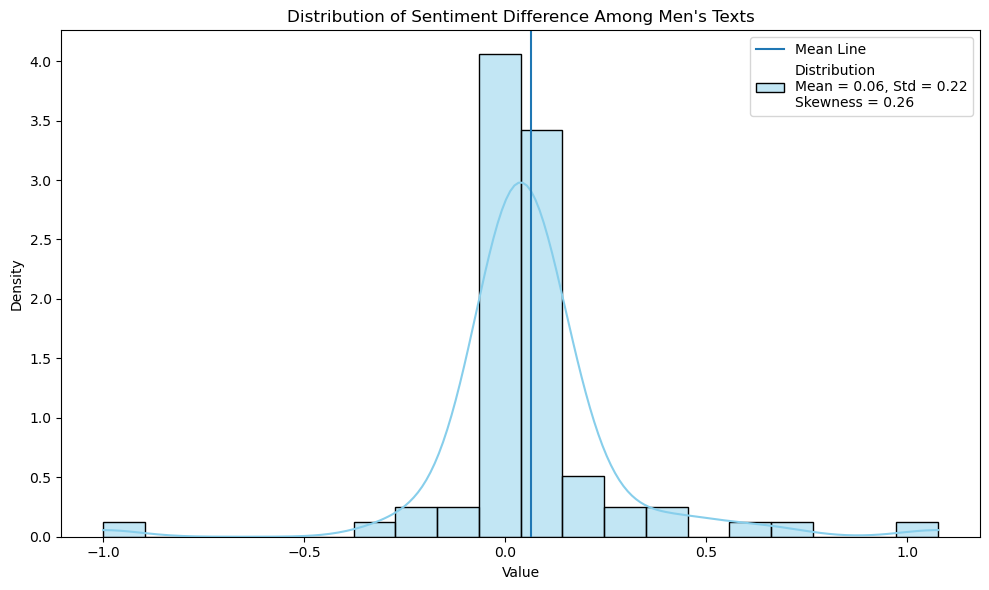

In [26]:
data = male_difference
plt.figure(figsize=(10, 6))
mu, std = np.mean(data), np.std(data)
sns.histplot(data, bins=20, kde=True, color='skyblue', stat='density', edgecolor='black', label=f"""Distribution\nMean = {mu:.2f}, Std = {std:.2f}
Skewness = {skew(data):.2f}""")
plt.axvline(x=mu, label = "Mean Line")
plt.title("Distribution of Sentiment Difference Among Men's Texts")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("distribution men.jpeg", dpi=200)
plt.show()